In [ ]:
import os
from PIL import Image
import hashlib
from collections import defaultdict

def getImageHash(imagePath):
    with Image.open(imagePath) as image:

        if image.mode != 'RGB':
            image = image.convert('L')
        
        image = image.resize((224, 224))
        
        return hashlib.md5(image.tobytes()).hexdigest()

def findAndDeleteDuplicates(folderPath):
    imageHashMap = {}
    duplicateCountByFolder = defaultdict(int)
    deletedFilePaths = []

    for rootDir, _, fileNames in os.walk(folderPath):
        folderName = os.path.basename(rootDir)
        for fileName in fileNames:
            filePath = os.path.join(rootDir, fileName)
            try:
                imageHash = getImageHash(filePath)
                if imageHash in imageHashMap:
                    os.remove(filePath)
                    deletedFilePaths.append(filePath)
                    duplicateCountByFolder[folderName] += 1
                else:
                    imageHashMap[imageHash] = filePath
            except Exception:
                pass  

    print("\nDuplicate count per subfolder:")
    for subfolderName, count in duplicateCountByFolder.items():
        print(f"Subfolder '{subfolderName}': {count} file(s) deleted")

    print(f"\nTotal duplicates deleted: {sum(duplicateCountByFolder.values())}")

findAndDeleteDuplicates("train")
findAndDeleteDuplicates("val")
findAndDeleteDuplicates("test")



Duplicate count per subfolder:
Subfolder 'CNV': 5570 file(s) deleted
Subfolder 'DME': 430 file(s) deleted
Subfolder 'DRUSEN': 786 file(s) deleted
Subfolder 'NORMAL': 201 file(s) deleted

Total duplicates deleted: 6987

Duplicate count per subfolder:

Total duplicates deleted: 0

Duplicate count per subfolder:

Total duplicates deleted: 0



Train Folder:
CNV: Total images are 31635
DME: Total images are 10918
DRUSEN: Total images are 7830
NORMAL: Total images are 26114

Val Folder:
CNV: Total images are 8
DME: Total images are 8
DRUSEN: Total images are 8
NORMAL: Total images are 8

Test Folder:
CNV: Total images are 242
DME: Total images are 242
DRUSEN: Total images are 242
NORMAL: Total images are 242


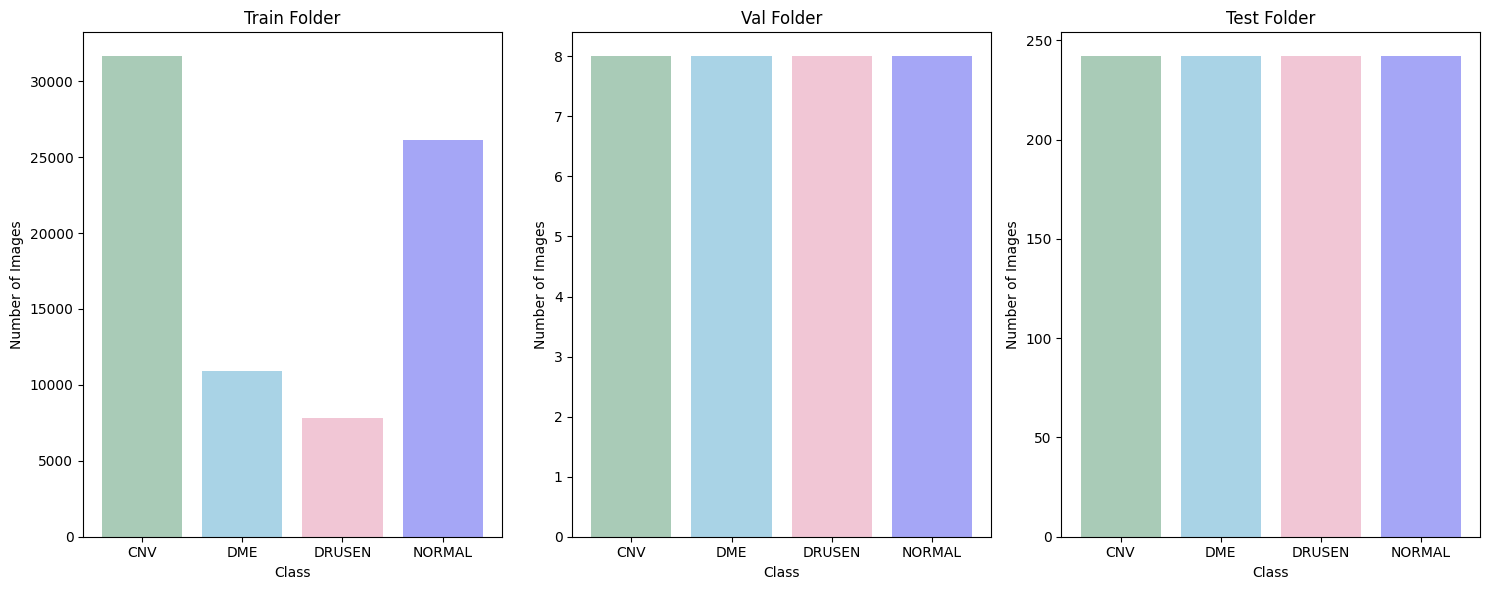

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

datasetFolders = ['train', 'val', 'test']
classNames = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

def countImagesPerClass(folderPath):
    imageCounts = {className: 0 for className in classNames}

    for className in classNames:
        classPath = os.path.join(folderPath, className)
        if os.path.exists(classPath) and os.path.isdir(classPath):
            imageFiles = [
                fileName for fileName in os.listdir(classPath)
                if fileName.lower().endswith(('.jpg', '.jpeg'))
            ]
            imageCounts[className] = len(imageFiles)

    return imageCounts

imageCountsByFolder = {
    folderName: countImagesPerClass(folderName)
    for folderName in datasetFolders
}

for folderName in datasetFolders:
    print(f"\n{folderName.capitalize()} Folder:")
    for className in classNames:
        count = imageCountsByFolder[folderName][className]
        print(f"{className}: Total images are {count}")

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

for index, folderName in enumerate(datasetFolders):
    classCounts = [imageCountsByFolder[folderName][className] for className in classNames]

    axes[index].bar(classNames, classCounts, color=['#A9CBB7', '#A9D3E6', '#F1C6D5', '#A5A6F6'])
    axes[index].set_title(f"{folderName.capitalize()} Folder")
    axes[index].set_xlabel("Class")
    axes[index].set_ylabel("Number of Images")
    axes[index].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil
import random

def moveImages(trainDir, valDir, numImagesPerClass=392):
    classFolders = [
        folderName for folderName in os.listdir(trainDir)
        if os.path.isdir(os.path.join(trainDir, folderName))
    ]

    for className in classFolders:
        trainClassPath = os.path.join(trainDir, className)
        valClassPath = os.path.join(valDir, className)

        os.makedirs(valClassPath, exist_ok=True)

        imageFiles = [
            fileName for fileName in os.listdir(trainClassPath)
            if os.path.isfile(os.path.join(trainClassPath, fileName))
        ]

        random.shuffle(imageFiles)
        imagesToMove = imageFiles[:numImagesPerClass]

        for imageName in imagesToMove:
            sourcePath = os.path.join(trainClassPath, imageName)
            destinationPath = os.path.join(valClassPath, imageName)

            shutil.move(sourcePath, destinationPath)

        print(f"Moved {len(imagesToMove)} images from '{className}' in train to val.")

trainFolder = "train"
valFolder = "val"
moveImages(trainFolder, valFolder, numImagesPerClass=392)


Moved 392 images from 'CNV' in train to val.
Moved 392 images from 'DME' in train to val.
Moved 392 images from 'DRUSEN' in train to val.
Moved 392 images from 'NORMAL' in train to val.


In [ ]:
import os
import random

def keepOnlyTargetImages(trainDir, targetCount=2000):
    for className in os.listdir(trainDir):
        classPath = os.path.join(trainDir, className)

        if os.path.isdir(classPath):
            imageFiles = [
                fileName for fileName in os.listdir(classPath)
                if fileName.lower().endswith(('.jpg', '.jpeg')) and os.path.isfile(os.path.join(classPath, fileName))
            ]

            totalImages = len(imageFiles)

            if totalImages > targetCount:
                print(f"Class '{className}': Found {totalImages} images. Deleting {totalImages - targetCount} images...")

                random.shuffle(imageFiles)
                imagesToDelete = imageFiles[targetCount:]

                for imageName in imagesToDelete:
                    try:
                        os.remove(os.path.join(classPath, imageName))
                    except Exception as error:
                        print(f"Error deleting {imageName}: {error}")
            else:
                print(f"Class '{className}': Only {totalImages} images found. No deletions needed.")

trainFolder = "train" 
keepOnlyTargetImages(trainFolder)


Class 'CNV': Found 31243 images. Deleting 29243 images...
Class 'DME': Found 10526 images. Deleting 8526 images...
Class 'DRUSEN': Found 7438 images. Deleting 5438 images...
Class 'NORMAL': Found 25722 images. Deleting 23722 images...



Train Folder:
CNV: Total images are 2000
DME: Total images are 2000
DRUSEN: Total images are 2000
NORMAL: Total images are 2000

Val Folder:
CNV: Total images are 400
DME: Total images are 400
DRUSEN: Total images are 400
NORMAL: Total images are 400

Test Folder:
CNV: Total images are 242
DME: Total images are 242
DRUSEN: Total images are 242
NORMAL: Total images are 242


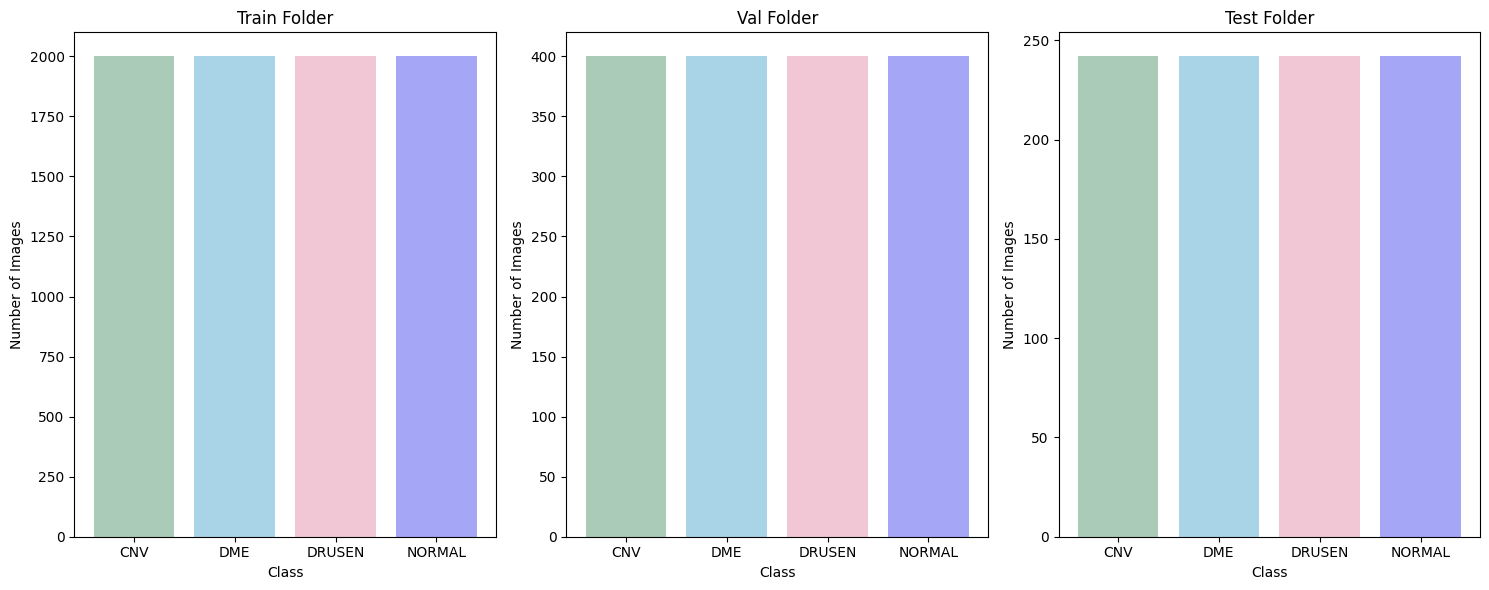

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

datasetFolders = ['train', 'val', 'test']
classNames = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

def countImagesPerClass(folderPath):
    imageCounts = {className: 0 for className in classNames}

    for className in classNames:
        classPath = os.path.join(folderPath, className)
        if os.path.exists(classPath) and os.path.isdir(classPath):
            imageFiles = [
                fileName for fileName in os.listdir(classPath)
                if fileName.lower().endswith(('.jpg', '.jpeg'))
            ]
            imageCounts[className] = len(imageFiles)

    return imageCounts

imageCountsByFolder = {
    folderName: countImagesPerClass(folderName)
    for folderName in datasetFolders
}

for folderName in datasetFolders:
    print(f"\n{folderName.capitalize()} Folder:")
    for className in classNames:
        count = imageCountsByFolder[folderName][className]
        print(f"{className}: Total images are {count}")

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

for index, folderName in enumerate(datasetFolders):
    classCounts = [imageCountsByFolder[folderName][className] for className in classNames]

    axes[index].bar(classNames, classCounts, color=['#A9CBB7', '#A9D3E6', '#F1C6D5', '#A5A6F6'])
    axes[index].set_title(f"{folderName.capitalize()} Folder")
    axes[index].set_xlabel("Class")
    axes[index].set_ylabel("Number of Images")
    axes[index].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()
